# 🛒 Supermart Grocery Sales Analysis & Sales Prediction

This project analyzes grocery sales data using Exploratory Data Analysis (EDA) 
and builds a machine learning model to predict sales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
plt.style.use('default')

## 📌 Problem Statement

The objective of this project is to analyze grocery sales data to:
- Identify high performing product categories
- Understand monthly and yearly sales trends
- Analyze city-wise sales performance
- Build a machine learning model to predict sales

In [5]:
import pandas as pd

df = pd.read_csv(
r"C:\Users\kanch\OneDrive\Desktop\Supermart-Grocery-Sales-Analysis\Supermart Grocery Sales - Retail Analytics Dataset.csv"
)

df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


## 🧹 Data Cleaning

In this step, we clean the dataset by:
- Checking for missing values
- Removing duplicate records
- Converting the Order Date column into datetime format

In [6]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


In [12]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu


## 🧠 Feature Engineering

In this step, we create new features from the Order Date column
to help in better analysis:
- Month Number
- Month Name
- Year

In [13]:
df['month_no'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.strftime('%B')
df['Year'] = df['Order Date'].dt.year

In [14]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month_no,Month,Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11.0,November,2017.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11.0,November,2017.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6.0,June,2017.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10.0,October,2016.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10.0,October,2016.0


In [15]:
print("Unique Months:", df['Month'].unique())
print("Unique Years:", df['Year'].unique())

Unique Months: ['November' 'June' 'October' nan 'December' 'September' 'March' 'April'
 'February' 'May' 'August' 'July' 'January']
Unique Years: [2017. 2016. 2015.   nan 2018.]


## 🔍 Exploratory Data Analysis (EDA)

In this step, we analyze the Supermart Grocery Sales data to understand
sales patterns, trends, and customer behavior using visualizations.

In [17]:
df.describe()

,Order Date,Sales,Discount,Profit,month_no,Year
count,4042,9994.000000,9994.000000,9994.000000,4042.000000,4042.000000
mean,2017-04-28 03:16:17.931716864,1496.596158,0.226817,374.937082,8.022761,2016.723404
min,2015-01-03 00:00:00,500.000000,0.100000,25.250000,1.000000,2015.000000
25%,2016-05-09 06:00:00,1000.000000,0.160000,180.022500,5.000000,2016.000000
50%,2017-07-01 00:00:00,1498.000000,0.230000,320.780000,9.000000,2017.000000
75%,2018-06-01 00:00:00,1994.750000,0.290000,525.627500,11.000000,2018.000000
max,2018-12-11 00:00:00,2500.000000,0.350000,1120.950000,12.000000,2018.000000
std,NaN,577.559036,0.074636,239.932881,3.267876,1.119750


### 📊 Total Sales by Category

This chart shows which product categories generate the highest sales.

<Axes: title={'center': 'Total Sales by Category'}, xlabel='Category'>

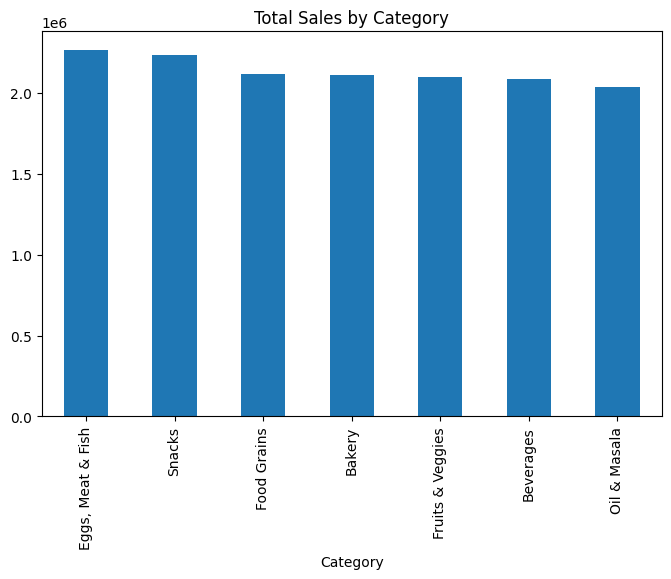

In [18]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

category_sales.plot(kind='bar', figsize=(8,5), title='Total Sales by Category')

### 🏙️ Sales by City

This visualization highlights top cities contributing to overall sales.

<Axes: title={'center': 'Top 10 Cities by Sales'}, xlabel='City'>

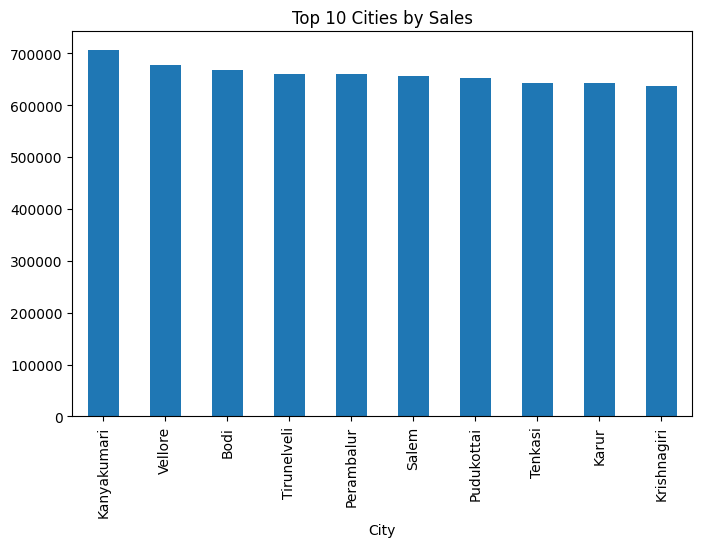

In [19]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

city_sales.plot(kind='bar', figsize=(8,5), title='Top 10 Cities by Sales')

### 📅 Monthly Sales Trend

This line chart represents sales variation across different months.

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='month_no'>

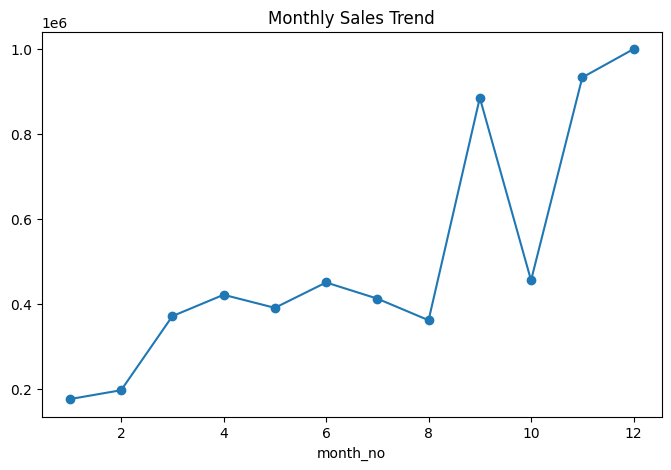

In [20]:
monthly_sales = df.groupby('month_no')['Sales'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(8,5), title='Monthly Sales Trend')

### 💸 Discount vs Profit

This scatter plot shows the relationship between discount and profit.

<Axes: title={'center': 'Discount vs Profit'}, xlabel='Discount', ylabel='Profit'>

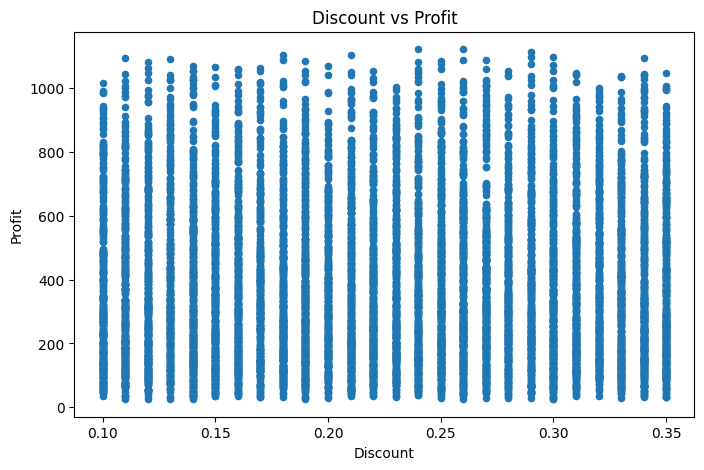

In [21]:
df.plot(
    x='Discount',
    y='Profit',
    kind='scatter',
    figsize=(8,5),
    title='Discount vs Profit'
)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

### 🔗 Correlation Analysis

Correlation matrix between Sales, Discount, and Profit.

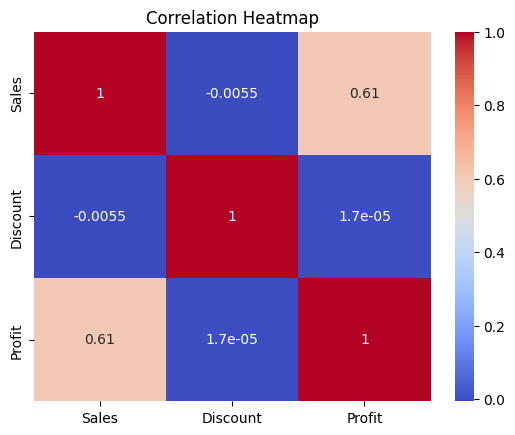

In [23]:
sns.heatmap(
    df[['Sales', 'Discount', 'Profit']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()

## 🤖 Machine Learning: Sales Prediction

In this step, we build a Linear Regression model to predict **Sales**
based on features like **Discount and Profit**.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 🎯 Feature Selection

- Independent Variables (X): Discount, Profit  
- Dependent Variable (y): Sales

In [25]:
X = df[['Discount', 'Profit']]
y = df['Sales']

### 🔀 Train-Test Split

We split the data into:
- 80% Training data
- 20% Testing data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### 🧠 Model Training

We train a Linear Regression model on the training data.

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 📈 Model Predictions

Predict sales values for the test dataset.

In [31]:
y_pred = model.predict(X_test)

### 📊 Model Evaluation Metrics

- MAE: Mean Absolute Error  
- MSE: Mean Squared Error  
- R² Score: Model accuracy indicator

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 379.1467786987074
Mean Squared Error: 212447.8328107208
R2 Score: 0.35586071609213366


### 📉 Actual vs Predicted Sales

This plot compares actual sales with predicted sales.

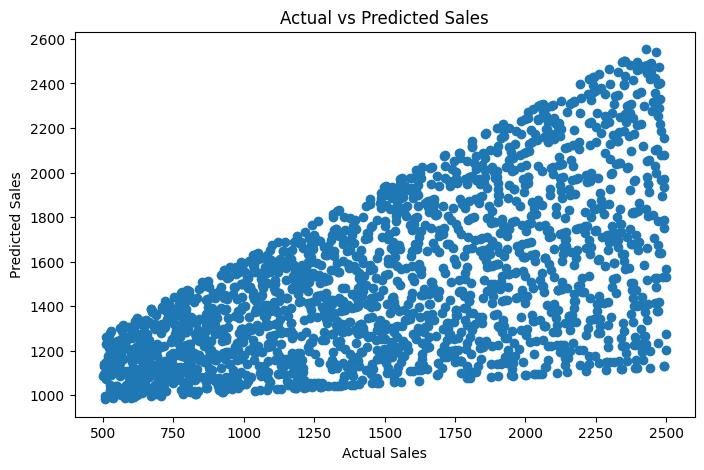

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

## ✅ Conclusion

This project analyzed the Supermart Grocery Sales dataset using
Exploratory Data Analysis and Machine Learning techniques.

### Key Insights:
- Certain product categories generate significantly higher sales.
- Sales show clear variation across months and cities.
- Discount has a noticeable impact on profit and sales.
- A Linear Regression model was successfully built to predict sales.

This project demonstrates skills in:
- Data Cleaning & Analysis
- Data Visualization
- Machine Learning (Linear Regression)
- Python libraries such as Pandas, Matplotlib, Seaborn, and Scikit-learn